# LinearSVM

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [28]:
#가상의 분류용 데이터
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=0.5, random_state=30)

In [31]:
X.shape, y #centers = 2 ; 2진분류

((100, 2),
 array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]))

sklearn.svm.SVC : 선형&비선형 SVC 모형 모듈
-  LinearSVM을 하고 싶다면?
- kernel = 'linear'로 설정해야한다.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
model_svc = SVC(C=10, kernel='linear').fit(X_train, y_train)
print('Learning finished!')

Learning finished!


In [38]:
model_svc.n_support_.shape #2행 1열 -> 2행 : 2진분류

(2,)

In [37]:
model_svc.n_support_ # support vector 3개(1개, 2개)

array([1, 2])

n\_support\_ : support vector의 개수

In [40]:
model_svc.support_vectors_ #support vector의 좌표

array([[ 3.05460221, -3.67969147],
       [ 3.55843523, -5.68977917],
       [ 2.86846825, -5.74247281]])

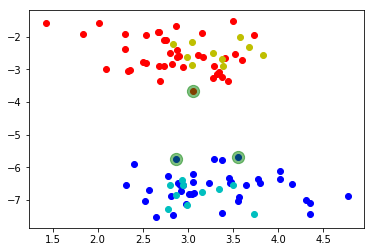

In [41]:
from matplotlib import pyplot as plt

#trainse data의 좌표
#class 1인 data => blue
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
#class 0인 data => red
plt.scatter(X_train[y_train==0, 0],
            X_train[y_train==0, 1], c='r')

#support vector인 data는 size 150, green, 반투명
plt.scatter(model_svc.support_vectors_[:, 0],
            model_svc.support_vectors_[:, 1],
            s=150, alpha=0.5, c='g')
#testset data
#class 1인 testset -> c
plt.scatter(X_test[y_test==1, 0],
            X_test[y_test==1, 1], c='c')
#class 0 testset -> yellow
plt.scatter(X_test[y_test==0, 0],
            X_test[y_test==0, 1], c='y', linewidth=1)

plt.show()

In [42]:
model_svc.score(X_test, y_test)

1.0

### 다른 방식으로 LinearSVM 구현하기

In [82]:
from sklearn.svm import LinearSVC

In [86]:
model_svc2 = LinearSVC(C=1, loss='hinge').fit(X_train, y_train)

In [87]:
model_svc2.score(X_test, y_test)

0.9

homework) C값을 0부터 0.1, 0.2, ~ 1까지 / 1, 2, 3, 10까지 바꿔가며 acc의 변화추이를 시각화해보기

In [26]:
from sklearn.datasets import load_wine

In [27]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [28]:
wine['data'][:, 5] *= 10000

In [29]:
import pandas as pd
X_w_df = pd.DataFrame(wine['data'])
X_w_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,28000.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,26500.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,28000.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,38500.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,28000.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [30]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(wine['data'],
                                         wine['target'],
                                         test_size=0.2,
                                         shuffle=True)

In [31]:
from sklearn.svm import SVC
model = SVC(C=1, kernel='linear')

In [32]:
model.fit(X_tr, y_tr)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
model.score(X_ts, y_ts)

0.9722222222222222

In [34]:
X_tr_df = pd.DataFrame(X_tr)
X_tr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.45,3.03,2.64,27.0,97.0,19000.0,0.58,0.63,1.14,7.50,0.67,1.73,880.0
1,12.17,1.45,2.53,19.0,104.0,18900.0,1.75,0.45,1.03,2.95,1.45,2.23,355.0
2,14.83,1.64,2.17,14.0,97.0,28000.0,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
3,12.25,3.88,2.20,18.5,112.0,13800.0,0.78,0.29,1.14,8.21,0.65,2.00,855.0
4,12.64,1.36,2.02,16.8,100.0,20200.0,1.41,0.53,0.62,5.75,0.98,1.59,450.0


In [35]:
from sklearn.preprocessing import StandardScaler

X_tr_sclr = StandardScaler().fit_transform(X_tr)
X_tr_sclr_df = pd.DataFrame(X_tr_sclr)
X_tr_sclr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.617631,0.612088,0.932452,2.191298,-0.201556,-0.604477,-1.390966,2.084522,-0.742970,1.090490,-1.252343,-1.234461,0.461968
1,-0.954120,-0.803519,0.547035,-0.186498,0.272077,-0.620230,-0.230151,0.679078,-0.942475,-0.905503,2.205367,-0.536248,-1.289441
2,2.242530,-0.633288,-0.714329,-1.672620,-0.201556,0.813254,0.990193,-0.570205,0.780521,0.081526,0.565171,0.329537,1.012410
3,-0.857981,1.373648,-0.609215,-0.335110,0.813373,-1.423611,-1.192536,-0.570205,-0.742970,1.401953,-1.341002,-0.857426,0.378567
4,-0.389299,-0.884155,-1.239898,-0.840392,0.001429,-0.415446,-0.567482,1.303720,-1.686084,0.322800,0.121875,-1.429961,-0.972519


In [36]:
model.fit(X_tr_sclr, y_tr)
model.score(X_ts, y_ts)

0.3888888888888889